In [2]:
%pip install -q torch torchvision torchaudio
%pip install -q ultralytics

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement torchaudio (from versions: none)
ERROR: No matching distribution found for torchaudio


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ultralytics (from versions: none)
ERROR: No matching distribution found for ultralytics


In [ ]:
# clone YOLOv5 repository
%cd /content
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.10 MiB | 19.53 MiB/s, done.
Resolving deltas: 100% (11855/11855), done.


In [ ]:
%cd /content
!git clone -b yolo5 https://github.com/ultralytics/yolov5.git


/content
fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%cd yolov5
!pip install -r requirements.txt

/content/yolov5


In [ ]:
!pip uninstall wandb -qy  # deprecated dependency
import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.5.1+cu124 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_processor_count=40, uuid=ea231cc1-e6ab-f708-7d99-cf92d3854245, L2_cache_size=4MB)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rgXaPFEHNMAFQFS3gpw7")
project = rf.workspace("oumaymamb").project("project_obj_seg")
version = project.version(2)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to project_obj_seg-2 in yolov5pytorch:: 100%|██████████| 1444/1444 [00:00<00:00, 7231.44it/s]


In [ ]:
import torch
from yolov5 import train

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Using device: cuda


In [ ]:
!python segment/train.py --data /content/yolov5/project_obj_seg-2/data.yaml \
                         --weights yolov5s-seg.pt \
                         --epochs 50 \
                         --img 640 \
                         --batch-size 16 \
                         --device 0  # Use GPU if available

2025-02-16 12:40:34.425200: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739709634.445382    5327 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739709634.451477    5327 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/project_obj_seg-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=exp, exis

In [ ]:
!python segment/val.py --data /content/yolov5/project_obj_seg-2/data.yaml --weights runs/train-seg/exp/weights/best.pt --img 640

segment/val: data=/content/yolov5/project_obj_seg-2/data.yaml, weights=['runs/train-seg/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/yolov5/project_obj_seg-2/valid/labels.cache... 61 images, 0 backgrounds, 0 corrupt: 100% 61/61 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:05<00:00,  2.94s/it]
                   all         61        265      0.989      0.981       0.99      0.916      0.981      0.974      0

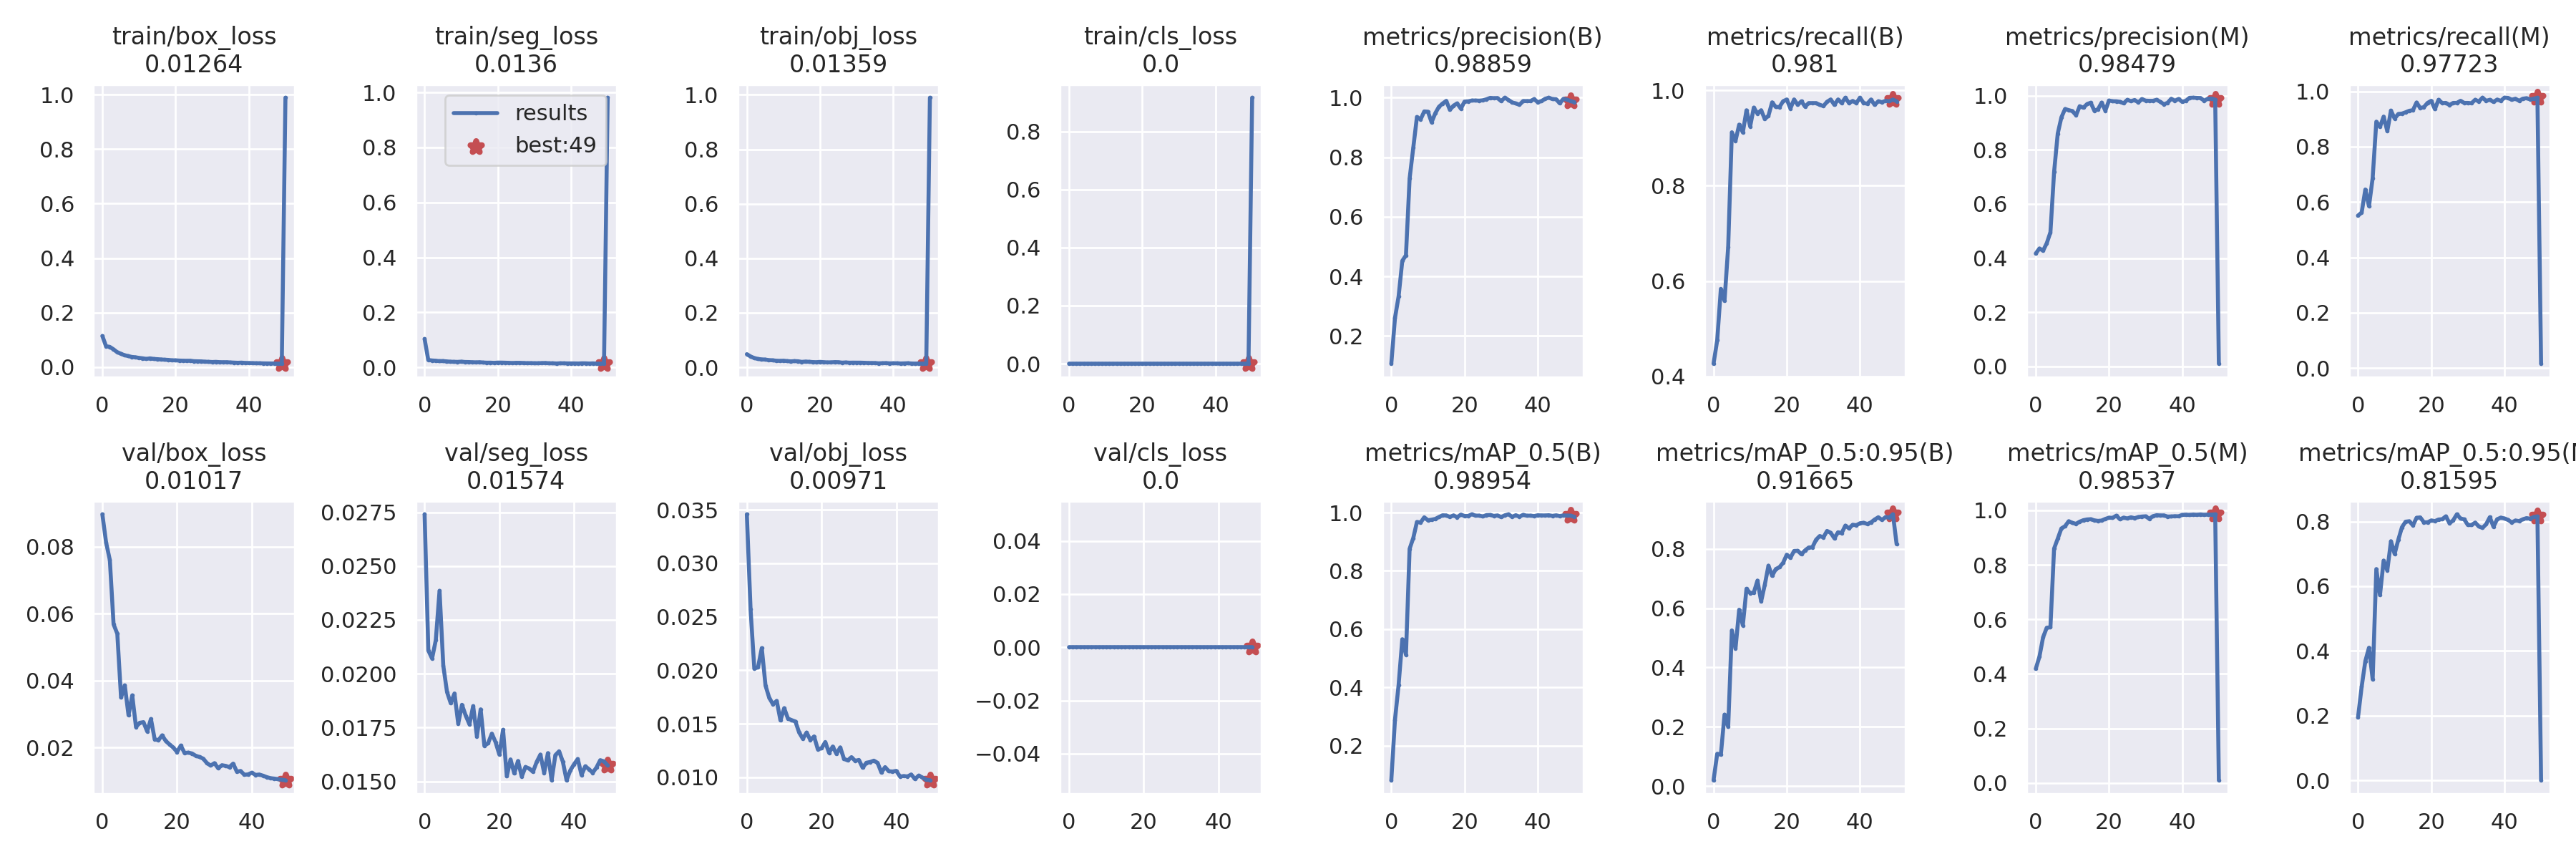

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train-seg/exp/results.png', width=1000)

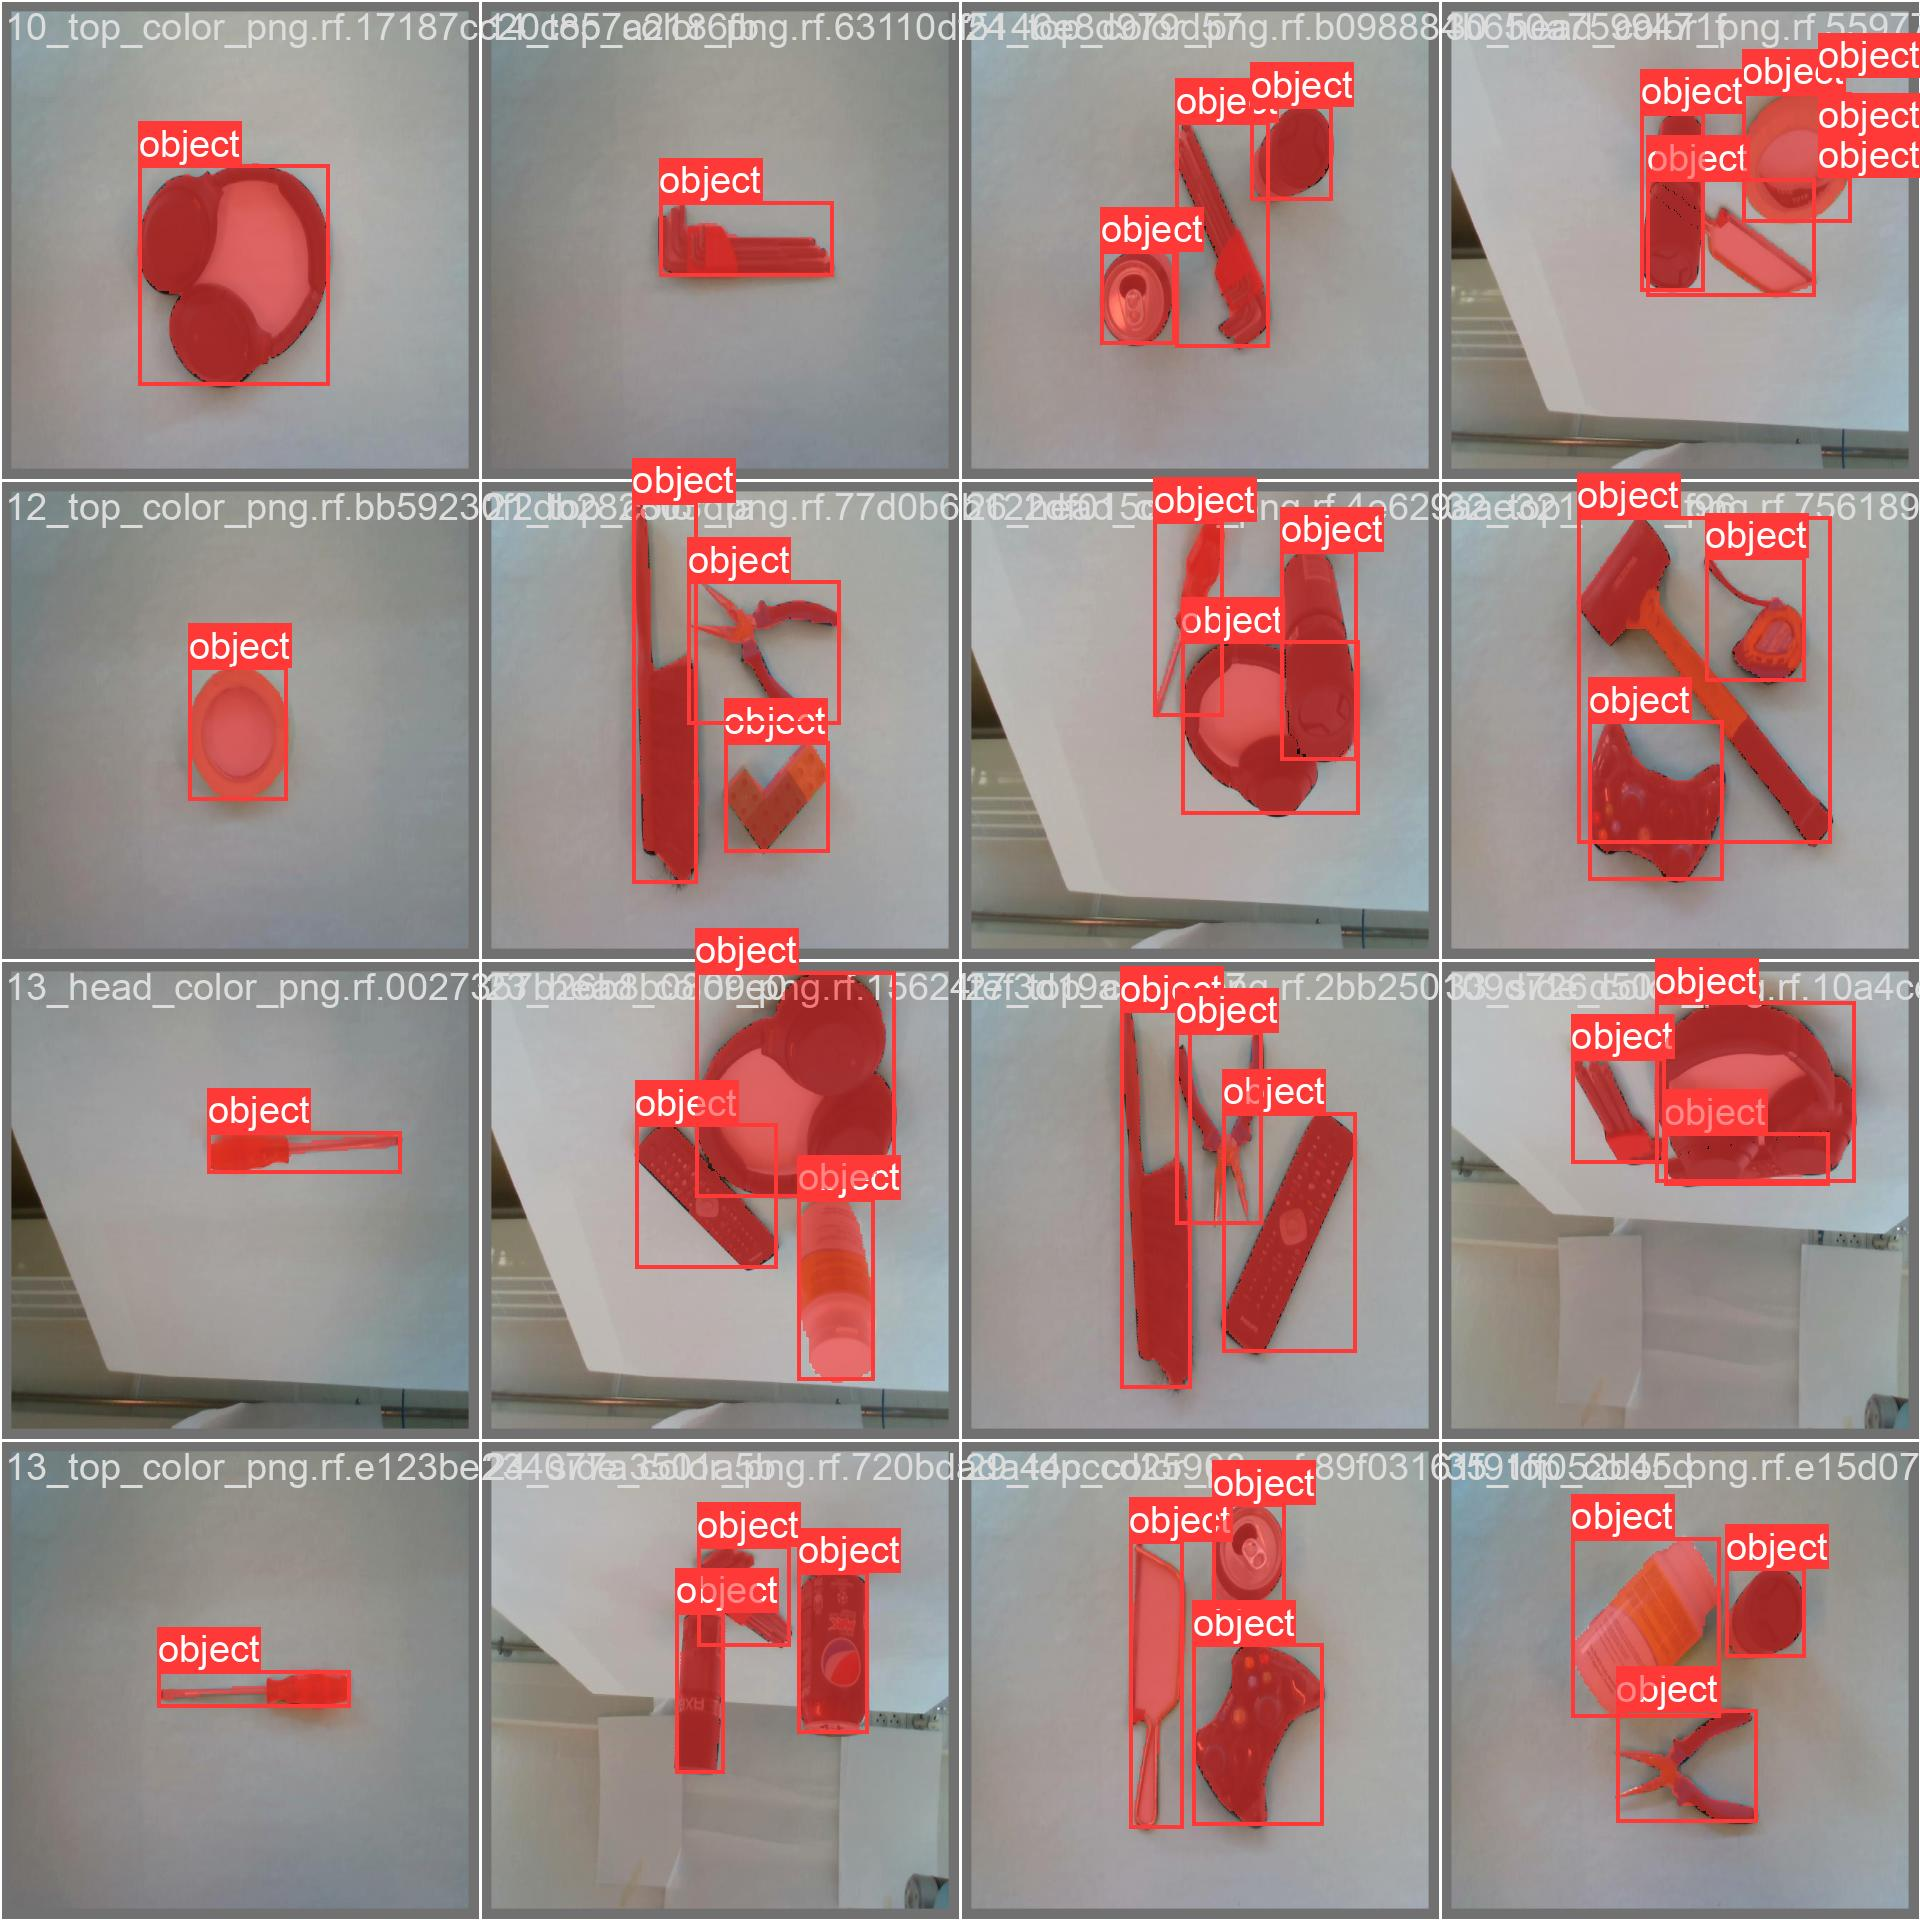

In [ ]:
Image(filename='/content/yolov5/runs/train-seg/exp/val_batch0_labels.jpg', width=1300)

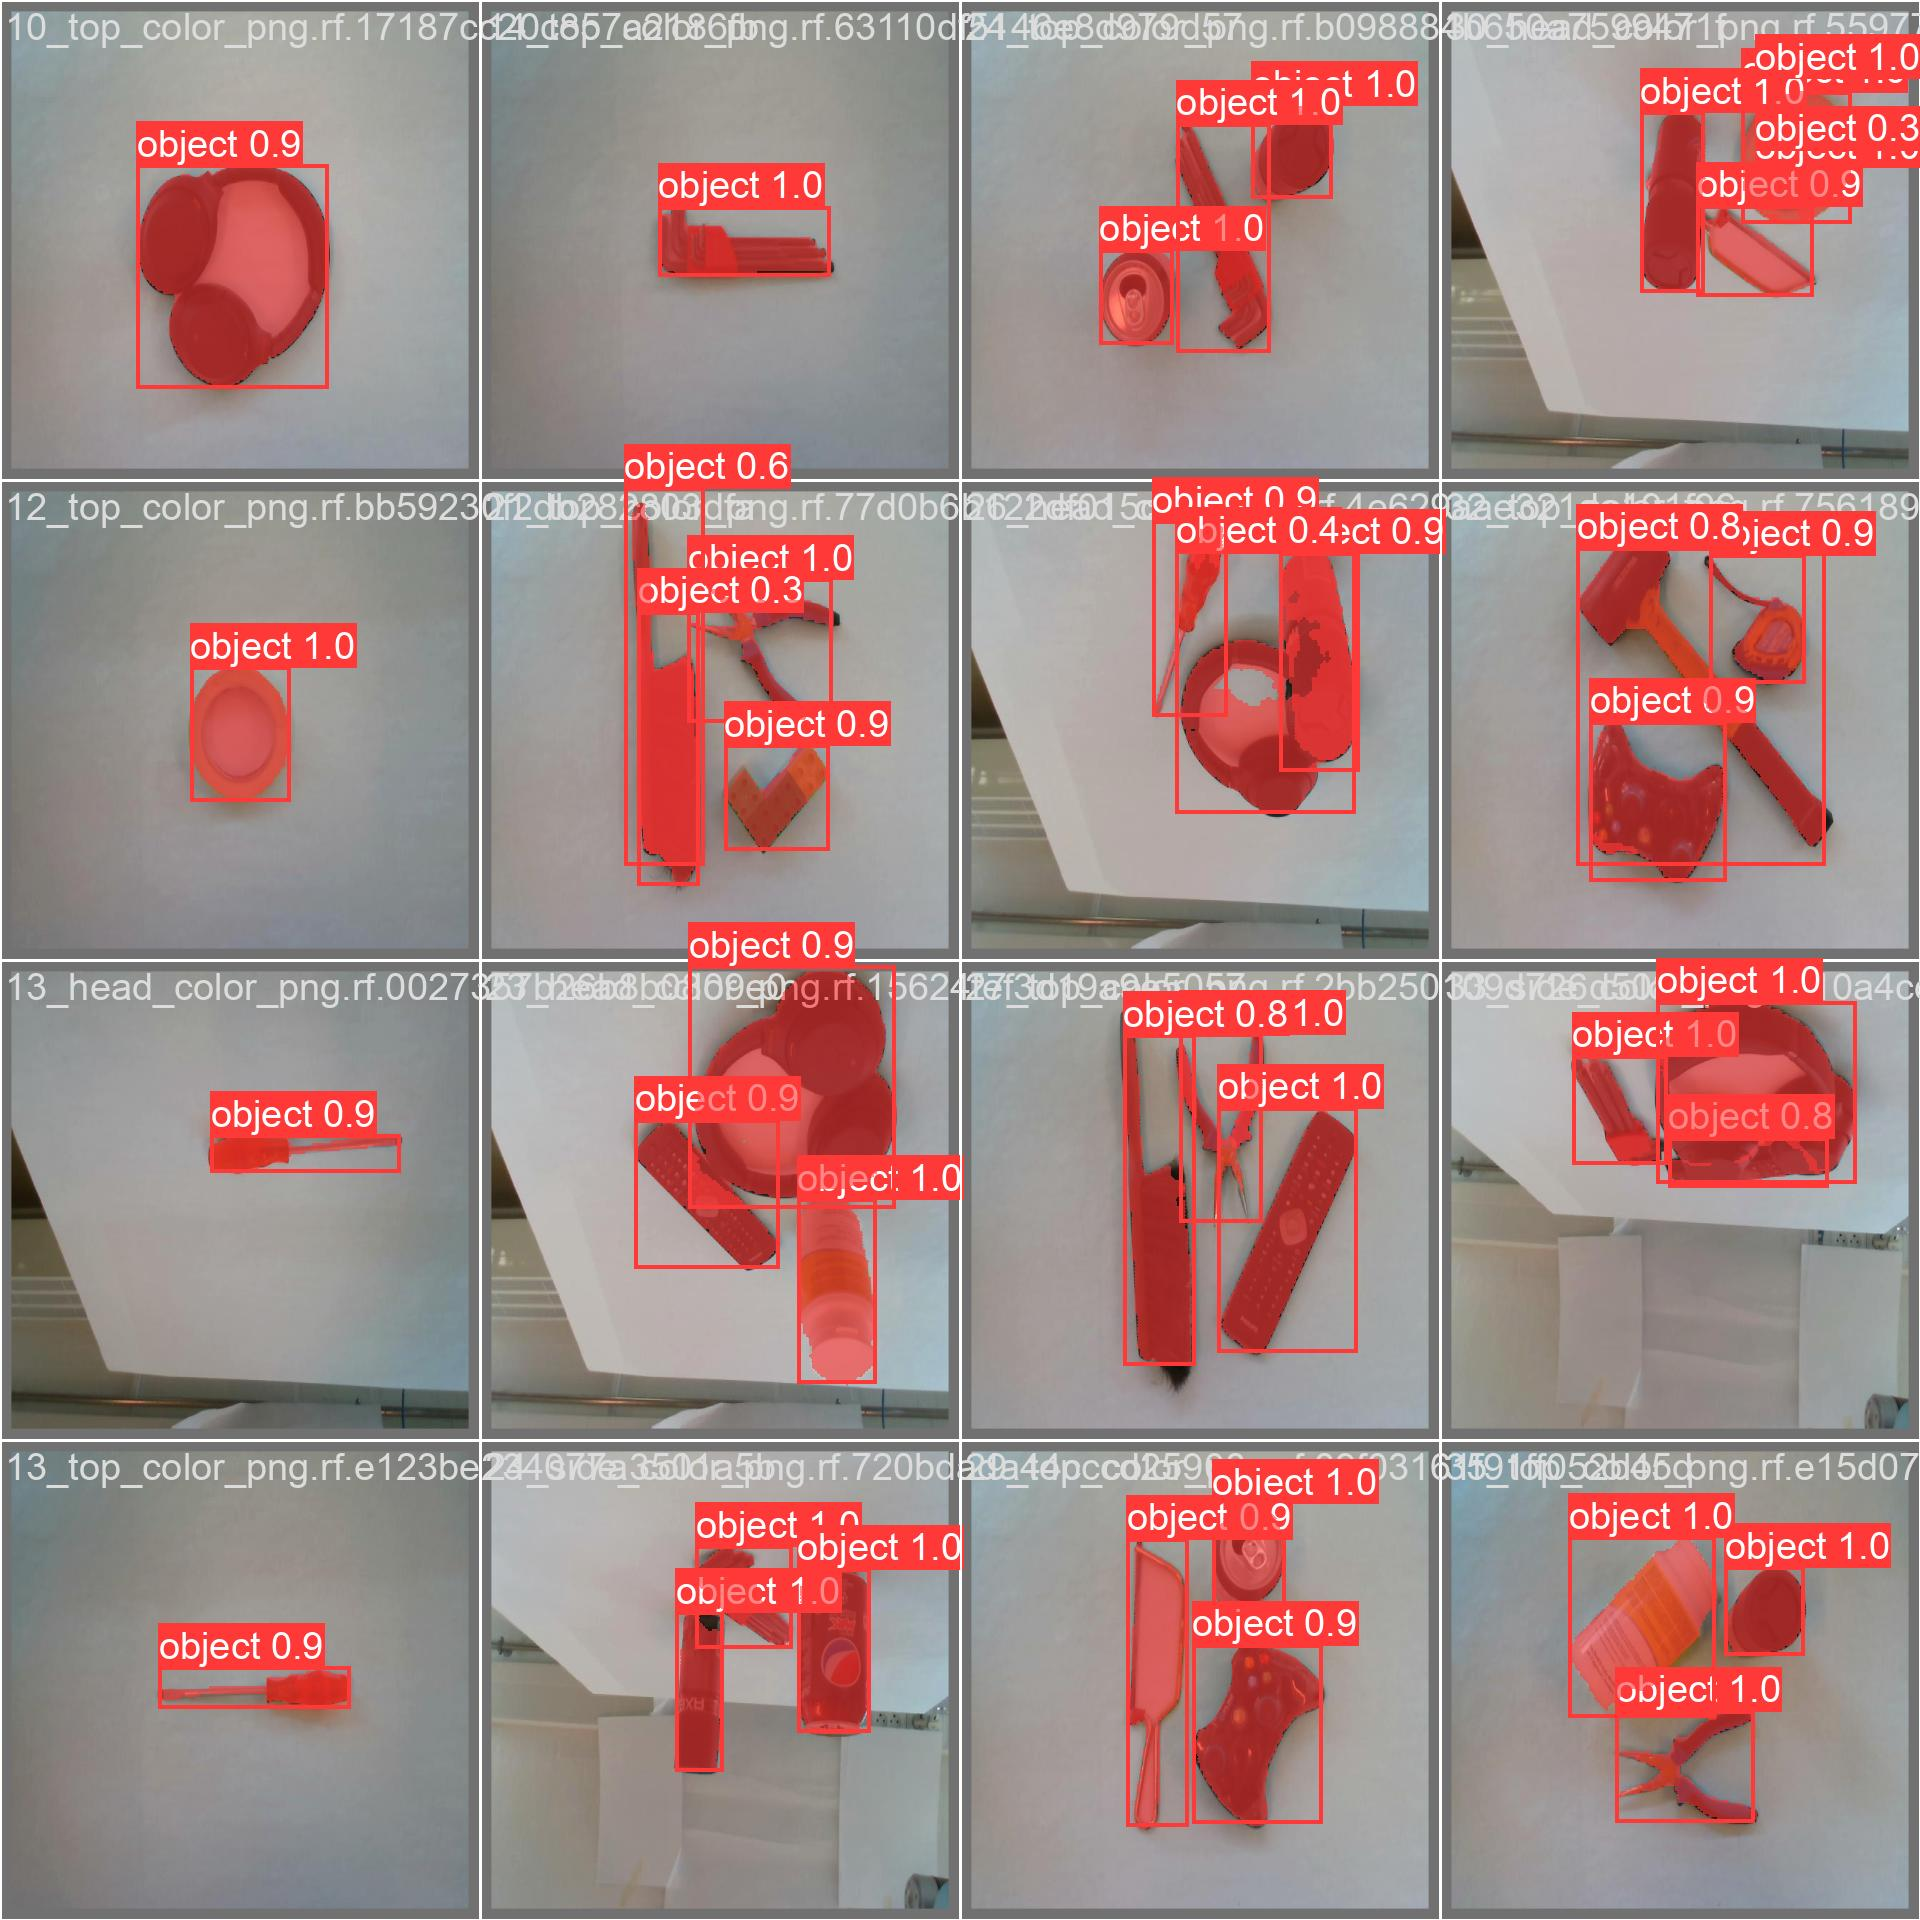

In [ ]:
Image(filename='/content/yolov5/runs/train-seg/exp/val_batch0_pred.jpg', width=1300)

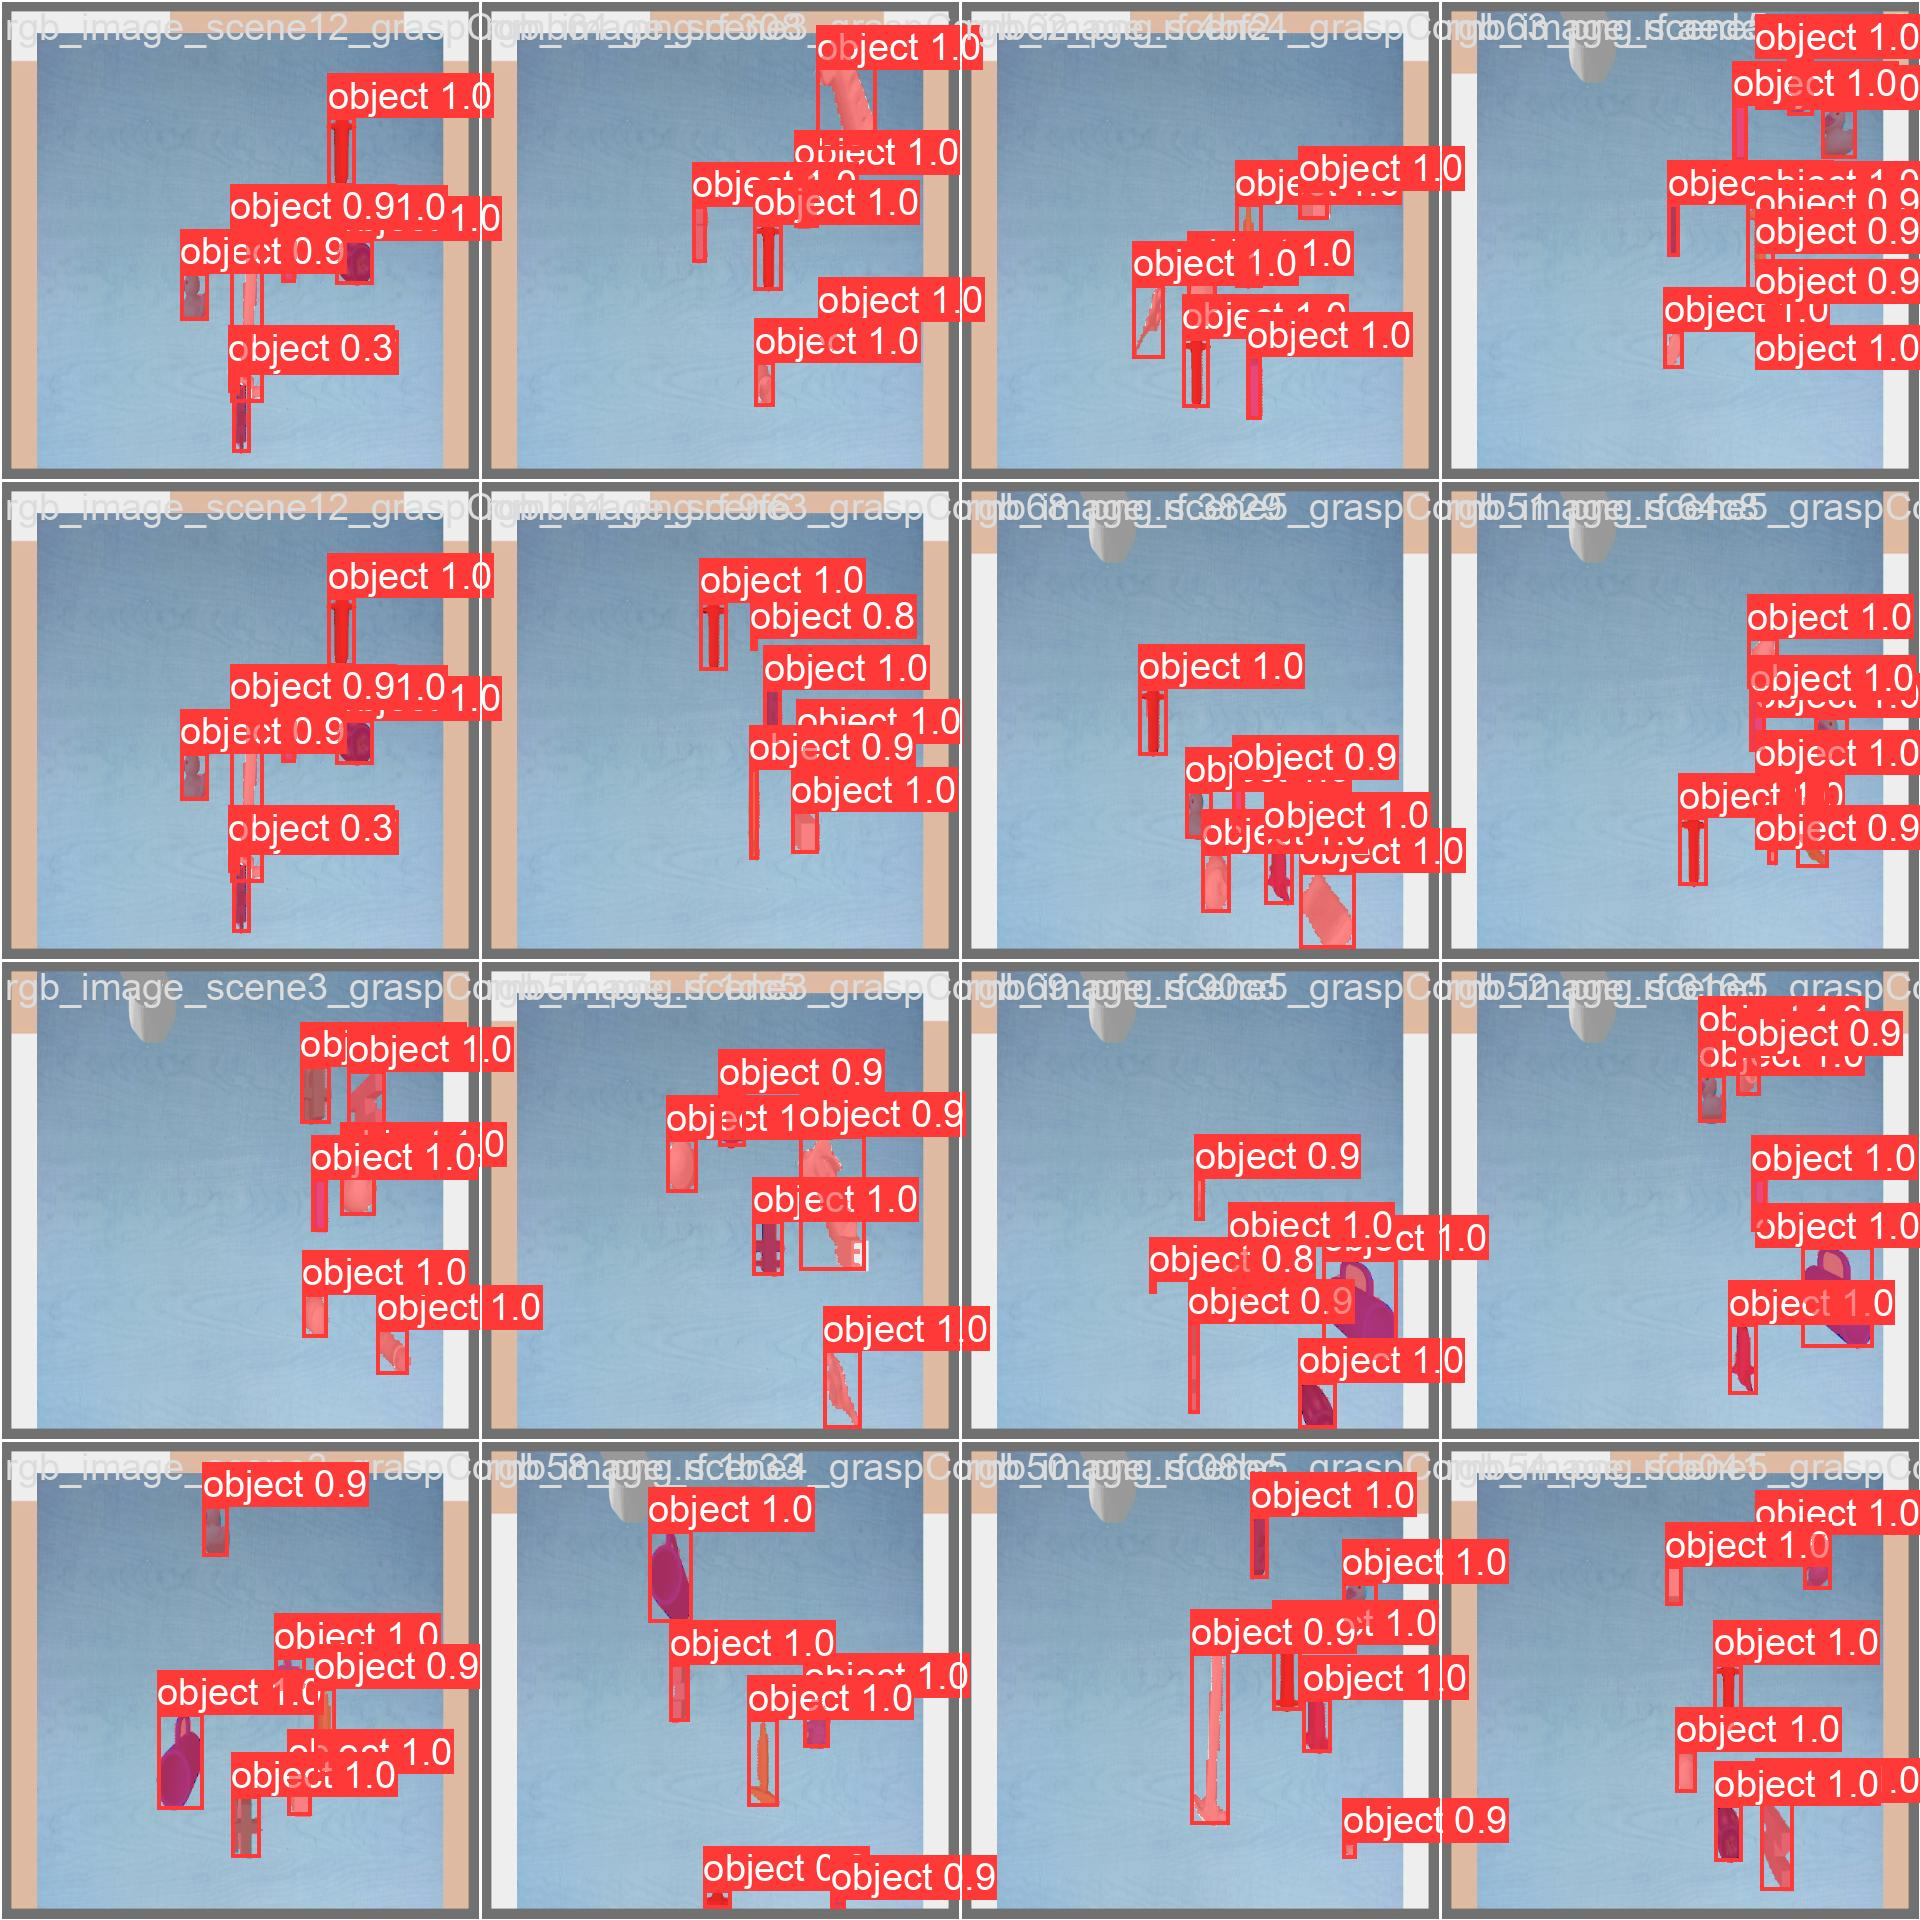

In [ ]:
Image(filename='/content/yolov5/runs/train-seg/exp/val_batch1_pred.jpg', width=1300)

In [ ]:
!python segment/predict.py --weights /content/yolov5/runs/train-seg/exp/weights/best.pt --source /content/yolov5/project_obj_seg-2/test/images --save-txt --save-crop --img 640 --device 0

segment/predict: weights=['/content/yolov5/runs/train-seg/exp/weights/best.pt'], source=/content/yolov5/project_obj_seg-2/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
image 1/28 /content/yolov5/project_obj_seg-2/test/images/11_side_color_png.rf.bf6d2293a8b3dda47df8a8d2644a5521.jpg: 640x640 1 object, 14.7ms
image 2/28 /content/yolov5/project_obj_seg-2/test/images/15_top_color_png.rf.1c88cc96f8f89f49f56a13830e346225.jpg: 640x640 3 

In [ ]:
!python segment/predict.py --weights /content/yolov5/runs/train-seg/exp/weights/best.pt --source /content/yolov5/project_obj_seg-2/test/images --save-txt --retina-masks --save --img 640 --device 0

segment/predict: weights=['/content/yolov5/runs/train-seg/exp/weights/best.pt'], source=/content/yolov5/project_obj_seg-2/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=True
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
image 1/28 /content/yolov5/project_obj_seg-2/test/images/11_side_color_png.rf.bf6d2293a8b3dda47df8a8d2644a5521.jpg: 640x640 1 object, 14.7ms
image 2/28 /content/yolov5/project_obj_seg-2/test/images/15_top_color_png.rf.1c88cc96f8f89f49f56a13830e346225.jpg: 640x640 3 

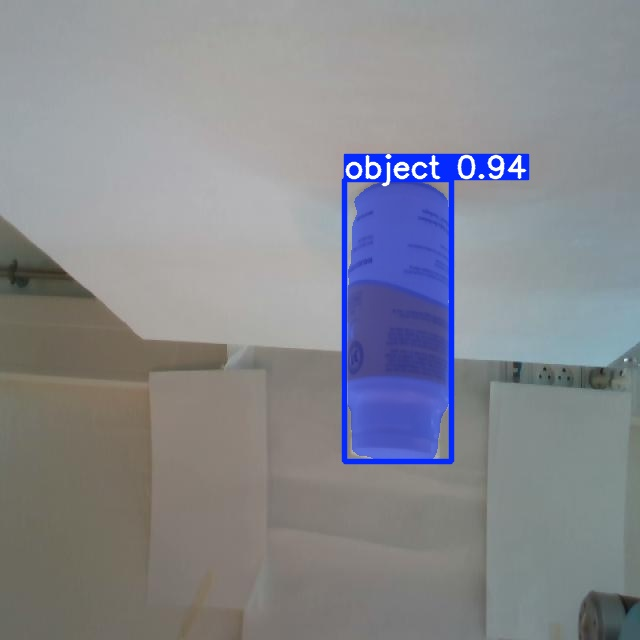

In [ ]:
Image(filename='/content/yolov5/runs/predict-seg/exp/11_side_color_png.rf.bf6d2293a8b3dda47df8a8d2644a5521.jpg', width=1300)

In [ ]:
Image(filename='/content/yolov5/runs/predict-seg/exp/11_side_color_png.rf.bf6d2293a8b3dda47df8a8d2644a5521.jpg', width=1300)

In [ ]:
import pandas as pd
results=pd.read_csv("/content/yolov5/runs/train-seg/exp/results.csv")
results

,epoch,train/box_loss,train/seg_loss,train/obj_loss,train/cls_loss,...,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.114180,0.103220,0.048167,0.0000,...,0.034580,0.0,0.070750,0.003250,0.003250
1,1,0.076565,0.026671,0.039976,0.0000,...,0.025687,0.0,0.040620,0.006453,0.006453
2,2,0.074243,0.024927,0.034155,0.0000,...,0.020154,0.0,0.010357,0.009524,0.009524
3,3,0.065564,0.024049,0.030895,0.0000,...,0.020277,0.0,0.009406,0.009406,0.009406
4,4,0.055133,0.022568,0.029064,0.0000,...,0.022071,0.0,0.009406,0.009406,0.009406
5,5,0.049200,0.022825,0.028576,0.0000,...,0.018566,0.0,0.009208,0.009208,0.009208
6,6,0.043689,0.021531,0.026453,0.0000,...,0.017414,0.0,0.009010,0.009010,0.009010
7,7,0.040695,0.020534,0.025946,0.0000,...,0.016822,0.0,0.008812,0.008812,0.008812
8,8,0.037283,0.020042,0.024234,0.0000,...,0.017135,0.0,0.008614,0.008614,0.008614
9,9,0.036016,0.019765,0.023760,0.0000,...,0.015312,0.0,0.008416,0.008416,0.008416
